In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Information Retrieval/A3/email-Eu-core.txt',sep = ' ', header=None)

In [ ]:
edges_arr = np.array(df)

In [ ]:
edges_arr

array([[  0,   1],
       [  2,   3],
       [  2,   4],
       ...,
       [440, 460],
       [ 52, 786],
       [506, 932]])

In [ ]:
count = 0
for i in range(25571):
  if(edges_arr[i,0] == edges_arr[i,1]):
    count += 1
print(count)

642


In [ ]:
adj_mat = np.zeros((1005,1005))

In [ ]:
adj_mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
for i in range(edges_arr.shape[0]):
  adj_mat[edges_arr[i][0],edges_arr[i][1]] += 1

In [ ]:
np.where(adj_mat[:,5] == 1)

(array([  0,   2,   5,   6,   7,  21,  29,  34,  35,  41,  42,  57,  58,
         59,  64,  82,  97, 100, 102, 105, 106, 115, 120, 125, 128, 132,
        133, 134, 135, 140, 141, 157, 163, 169, 170, 171, 177, 183, 184,
        189, 191, 194, 195, 198, 201, 207, 209, 211, 215, 218, 230, 232,
        234, 236, 237, 242, 249, 252, 255, 269, 281, 283, 284, 285, 302,
        303, 305, 309, 318, 323, 327, 333, 337, 346, 349, 351, 357, 362,
        374, 379, 405, 408, 411, 417, 419, 420, 423, 430, 437, 438, 440,
        445, 450, 455, 458, 462, 466, 481, 486, 489, 492, 511, 516, 520,
        527, 528, 619, 644, 681, 690, 697, 716, 726, 730, 763, 789, 809,
        815, 820, 833, 900, 902, 931, 980]),)

In [ ]:
adj_mat[816,816]

1.0

In [ ]:
count = 0
for i in range(1005):
  if(adj_mat[i,i] == 1):
    count += 1
print(count)

642


In [ ]:
def PageRank(in_val = 1 , d = 0.1, max_iter = 100):
    node_list = [i for i in range(1005)]
    pagerank = [in_val for _ in range(1005)]
    for iter in range(max_iter):
      for node in node_list:
          in_neighbors = np.where(adj_mat[:,node] == 1)[0]
          pagerank_sum = sum((pagerank[neigh] /  np.where(adj_mat[neigh,:] == 1)[0].shape[0]) for neigh in in_neighbors)
          random_walk = d / 1005
          pagerank[node] = random_walk + (1-d) * pagerank_sum
    return pagerank

In [ ]:
pr = PageRank()
  

#HIT

In [ ]:
import math
def hit(max_iter = 1):
  
  hub_scores = np.array([1 for _ in range(1005)], dtype=np.float64)
  authority_scores = np.array([1 for _ in range(1005)], dtype=np.float64)
  
  
  for iter in range(max_iter):
    
    for node in range(1005):
      in_neighbors = np.where(adj_mat[:,node] == 1)[0] 
      out_neighbors = np.where(adj_mat[node,:] == 1)[0]
      hub_scores[node] = np.sum(authority_scores[out_neighbors])
      authority_scores[node] = np.sum(hub_scores[in_neighbors])
    
    #hub_norm = math.sqrt((np.sum(hub_scores**2)))
    #authority_norm = math.sqrt((np.sum(authority_scores**2)))

    hub_norm = np.sum(hub_scores)
    authority_norm = np.sum(authority_scores)

    # hub_norm = np.linalg.norm(hub_scores)
    # authority_norm = np.linalg.norm(authority_scores)
    
    hub_scores = hub_scores / hub_norm
    authority_scores = authority_scores / authority_norm
  
  return hub_scores, authority_scores

In [ ]:
hub,auth = hit(1)

In [ ]:
hub

array([1.70324269e-47, 4.15425045e-49, 3.48957038e-47, ...,
       0.00000000e+00, 9.64933061e-20, 0.00000000e+00])

In [ ]:
hub

array([1.70324269e-47, 4.15425045e-49, 3.48957038e-47, ...,
       0.00000000e+00, 9.64933061e-20, 0.00000000e+00])

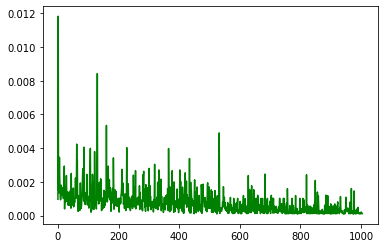

In [ ]:
#for i in range(1005):
#  print(pr[i] ,"     ", hub[i] ,"     ", auth[i])

plt.plot([i for i in range(1005)],pr,c='green')


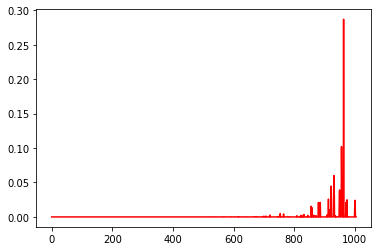

In [ ]:
plt.plot([i for i in range(1005)],hub,c='red')

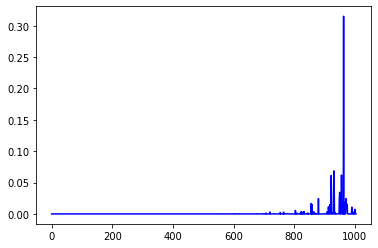

In [ ]:
plt.plot([i for i in range(1005)],auth,c='blue')

In [ ]:
import networkx as nx
   
G = nx.Graph()
G.add_nodes_from([i for i in range(1005)])
G.add_edges_from(edges_arr)


In [ ]:
pr=nx.pagerank(G,0.1)

In [ ]:
pr

{0: 0.0010012665238367394,
 1: 0.0010325335814251645,
 2: 0.0012245314524361802,
 3: 0.0010609198505402758,
 4: 0.0011477241405605954,
 5: 0.0016346578573148511,
 6: 0.0012863447458259995,
 7: 0.0011199845753505342,
 8: 0.000984064584355135,
 9: 0.0010282756019671187,
 10: 0.0009960361116832048,
 11: 0.0011101810843310437,
 12: 0.00114075182687039,
 13: 0.0013969965746417098,
 14: 0.0011209608256081151,
 15: 0.001044373805799909,
 16: 0.0010381426529244996,
 17: 0.0011588881881139834,
 18: 0.0010342734154685077,
 19: 0.0010658243681338595,
 20: 0.0011114332279085995,
 21: 0.0013601560018956843,
 22: 0.0009323342890510972,
 23: 0.0010967207881839032,
 24: 0.0010845547657738525,
 25: 0.0009575899072363557,
 26: 0.0009757422963846162,
 27: 0.0011143482855110079,
 28: 0.001133179917018277,
 29: 0.001023712680806595,
 30: 0.0010525104423320338,
 31: 0.0009831091196377244,
 32: 0.0009685611627934009,
 33: 0.0009713004172290027,
 34: 0.0009615532441966482,
 35: 0.0010251851632514207,
 36: 0.0

Text(0.5, 1.0, 'Pagerank Vs Node-Id')

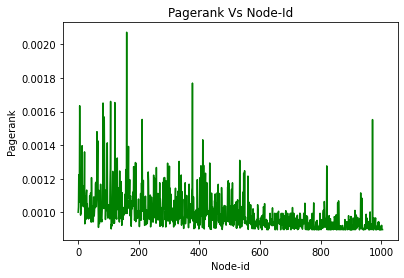

In [ ]:
plt.plot([i for i in range(1005)],list(pr.values()),c='green')

plt.xlabel('Node-id')
plt.ylabel('Pagerank')
plt.title('Pagerank Vs Node-Id')

In [ ]:
hubs, authorities = nx.hits(G, max_iter = 10, normalized = True)

Text(0.5, 1.0, 'Hub Score Vs Node-Id')

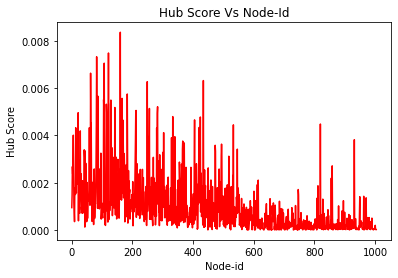

In [ ]:
plt.plot([i for i in range(1005)],list(hubs.values()),c='red')

plt.xlabel('Node-id')
plt.ylabel('Hub Score')
plt.title('Hub Score Vs Node-Id')

Text(0.5, 1.0, 'Authority Score Vs Node-Id')

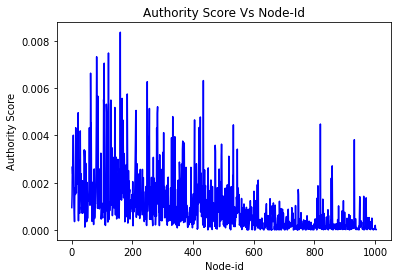

In [ ]:
plt.plot([i for i in range(1005)],list(authorities.values()),c='blue')

plt.xlabel('Node-id')
plt.ylabel('Authority Score')
plt.title('Authority Score Vs Node-Id')